# Titanic Shipwreck Competition

# Problem Statement
- The aim is to use Machine Learning to create a predictive model, using passenger data (i.e., name, age, gender, socio-economic class, etc), that answers the question, *"What types of people were more likely to survive?"*

- Dataset columns:
    1. Survival : 0 = No, 1 = Yes
    2. Pclass - Ticket Class : 1 = 1st, 2 = 2nd, 3 = 3rd
    3. Sex - gender
    4. Age -  in years
    5. sibsp : # of siblings / spouses aboard the Titanic
    6. parch : # of parents / children aboard the Titanic
    7. ticket - Ticket Number
    8. fare - Passeneger fare
    9. cabin - Cabin Number
    10. embarked : Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
## Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# to have plots in notebook
%matplotlib inline 

- The goal is to train a model on the Train Dataset, get an optimal model and use it on the Test Dataset.

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")

## Exploratory Data Analysis

### File Structure and Content

In [3]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Columns with object data types = Name,Sex,Ticket, Cabin and Embarked.
- Rest of the columns with numerical data types.

In [5]:
# Shape of the data

print('We have {} rows.'.format(train_data.shape[0]))
print('We have {} columns'.format(train_data.shape[1]))

We have 891 rows.
We have 12 columns


In [6]:
# statistical summary of each column of train data

train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# train data correlation between columns - used to describe the relationship between different columns 
# which are also used as features of the dataset

train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Negative correlation between survival and passenger class, age and sibsp, i.e. the higher the value the lower the chances of survival.
- Positive corrrelation between survival and Parch and Fare, i.e. the lower the value the lower the chances of survival.


### Missing Value Analysis

In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Missing values for columns, Age (float), Cabin (object) and Embarked (object).
- Goal is to use the mode value for categorical data, and the mean value for numerical data.

#### Will replace Embarked column with mode value.

In [9]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Most passengers embarked from Southampton  ('s')

In [10]:
emb_mode_val = train_data['Embarked'].mode()[0]

In [11]:
train_data['Embarked'] = train_data['Embarked'].fillna(emb_mode_val)

#### Will replace Age column with mean value, rounded up.


In [12]:
train_data[['Name', 'Age']].loc[(train_data['Age'].isnull()>0)]

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
...,...,...
859,"Razi, Mr. Raihed",NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN
868,"van Melkebeke, Mr. Philemon",NaN
878,"Laleff, Mr. Kristo",NaN


- Survey on individuals with missing age values; presence of 'Mr.', 'Master', 'Miss' showing not so young age

In [13]:
age_mean_val = train_data['Age'].mean().round()
age_mean_val

30.0

In [14]:
train_data['Age'] = train_data['Age'].fillna(age_mean_val)

### Will replace Cabin column with mode value.

In [15]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [16]:
cabin_mode_val = train_data['Cabin'].mode()[0]

In [17]:
train_data['Cabin'] = train_data['Cabin'].fillna(cabin_mode_val)

### Checking missing values in data

In [18]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization

## Univariate Data Analysis

### Categorical Data

Text(0.5, 1.0, 'Survived')

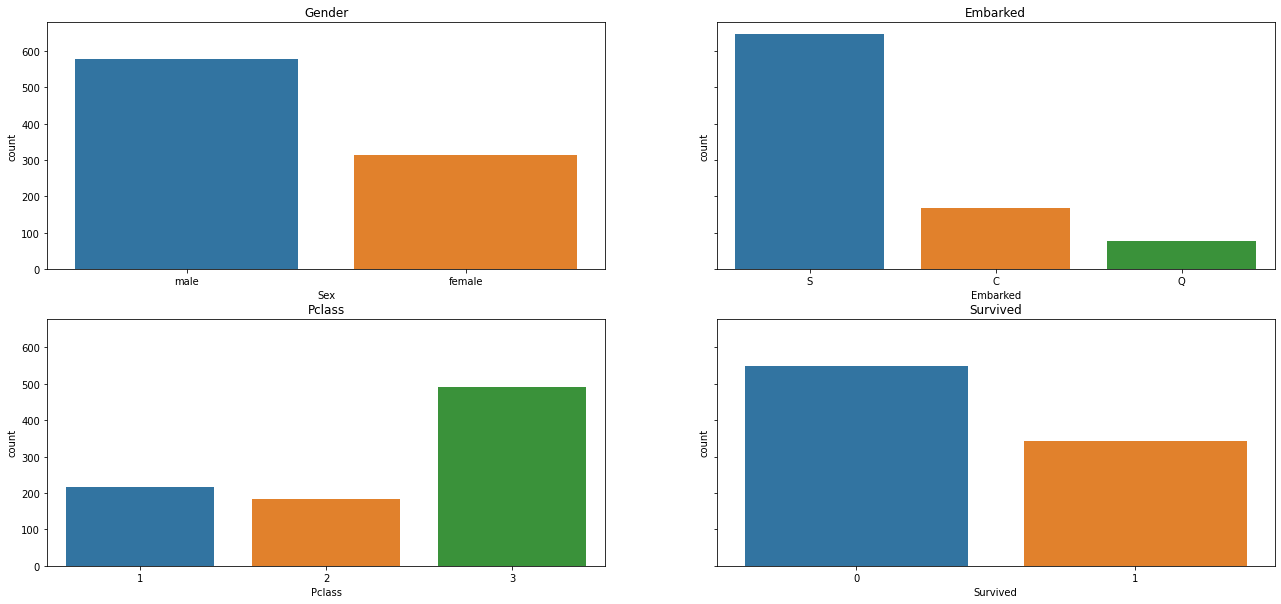

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(22,10), sharex=False, sharey=True)

sns.countplot(x = train_data['Sex'], ax = ax[0,0])
sns.countplot(x = train_data['Embarked'], ax = ax[0,1])
sns.countplot(x = train_data['Pclass'], ax = ax[1,0])
sns.countplot(x = train_data['Survived'], ax = ax[1,1])

ax[0,0].set_title("Gender")
ax[0,1].set_title("Embarked")
ax[1,0].set_title("Pclass")
ax[1,1].set_title("Survived")

- More males than females were aboard the Titanic
- More passenger embarked from Southampton while the least number of passengers embalred from Queenstown
- More passengers in class 3, while the least number of passengers in class 2
- Survival rate was low as more passenegers did not survive (0) compared to those who survived (1)

### Numerical Data

Text(0, 0.5, 'Frequency')

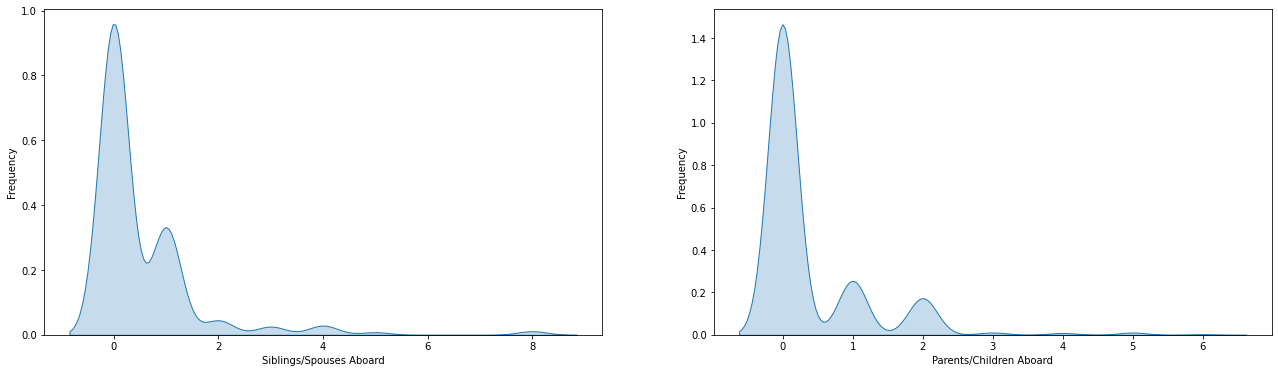

In [20]:
plt.figure(figsize=(22, 6))

# Siblings/Spouses Aboard
plt.subplot(121)
sns.kdeplot("SibSp", data = train_data, fill = True)
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Frequency')

# Parents/Children Aboard
plt.subplot(122)
sns.kdeplot("Parch", data = train_data, fill = True)
plt.xlabel('Parents/Children Aboard')
plt.ylabel('Frequency')

Highest number of Siblings/Spouses and Parents/Children aboard the titanic is zero for both cases.

Text(0, 0.5, 'Frequency')

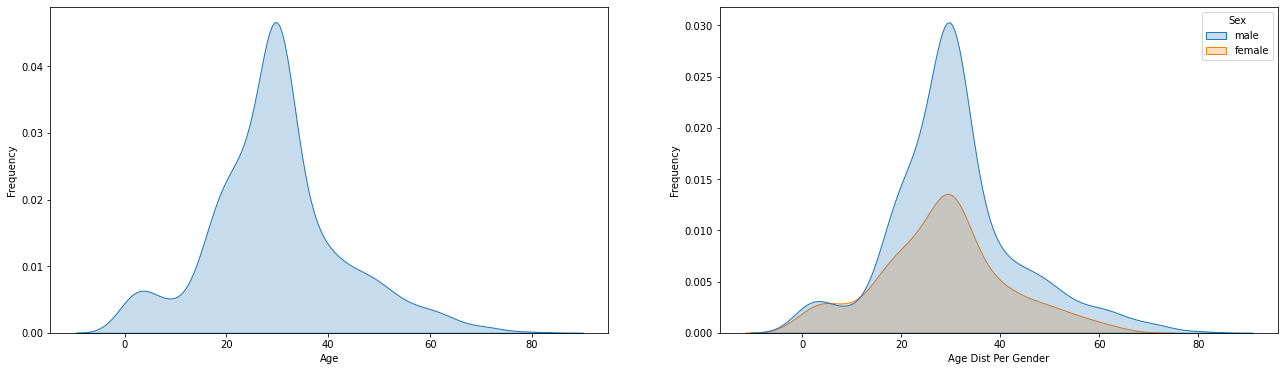

In [21]:
plt.figure(figsize=(22, 6))

# Age distribution
plt.subplot(121)
sns.kdeplot("Age", data = train_data, fill = True)
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age distribution for each gender
plt.subplot(122)
sns.kdeplot("Age", data = train_data, hue = "Sex", fill = True)
plt.xlabel('Age Dist Per Gender')
plt.ylabel('Frequency')

Most individuals on board were between the ages of 20 and 40, and for both genders.

Text(0, 0.5, 'Frequency')

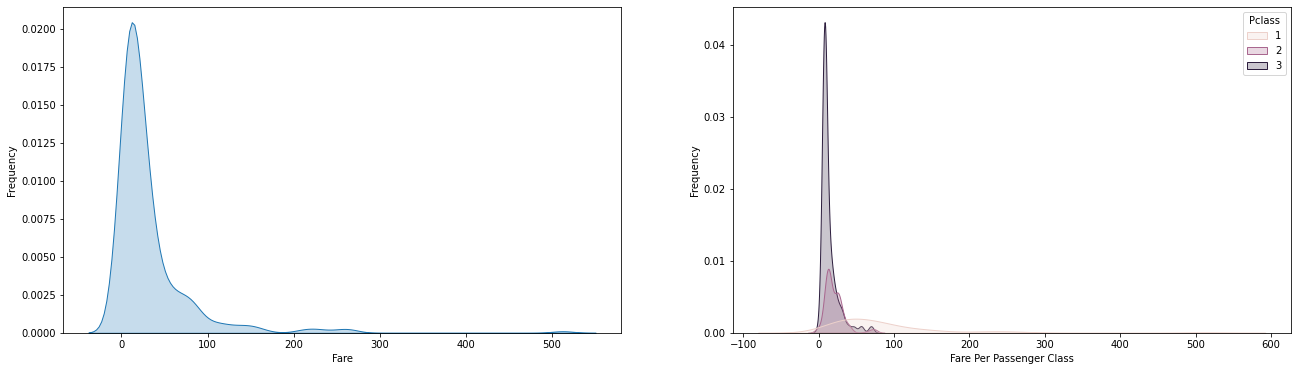

In [22]:
plt.figure(figsize=(22, 6))

# Fare distribution
plt.subplot(121)
sns.kdeplot("Fare", data = train_data, fill = True)
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Fare distribution for each Passenger Class
plt.subplot(122)
sns.kdeplot("Fare", data = train_data, hue = "Pclass", fill = True)
plt.xlabel('Fare Per Passenger Class')
plt.ylabel('Frequency')

- Highest fare frequency between 0 and about 70.
- Passenger class 1 with fare exceeding 100, class 2 and 3 with fare amounts greater than zero but less than 100.

## Dependent Variable Analysis

In [23]:
# We already ascertained that less individuals survived (1) compared to those that did not survive (0).

print(train_data['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


### Comparative analysis of survival rates between different genders, embarking stations, passenger classes,  ages, parch and sibsp.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

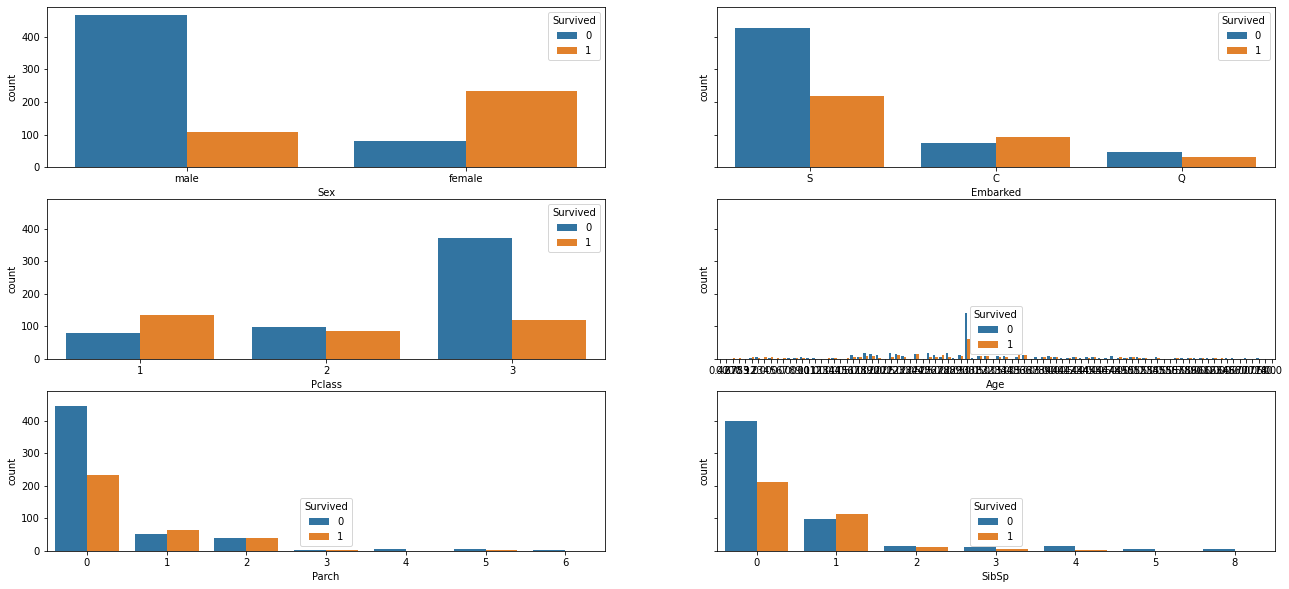

In [24]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(22,10), sharex=False, sharey=True)

sns.countplot(x = train_data['Sex'], hue = train_data["Survived"], ax = ax[0,0])
sns.countplot(x = train_data['Embarked'], hue = train_data["Survived"], ax = ax[0,1])
sns.countplot(x = train_data['Pclass'], hue = train_data["Survived"], ax = ax[1,0])
sns.countplot(x = train_data["Age"], hue = train_data["Survived"], ax = ax[1,1])
sns.countplot(x = "Parch", data = train_data, hue = "Survived", ax = ax[2,0])
sns.countplot(x = "SibSp", data = train_data, hue = "Survived", ax = ax[2,1])


- Survival rate among males lower compared to females.
- More passengers embarked from station 'S', which also had the least survival rate. Station 'Q' had the least number of passengers, and a lower survival rate as well.
- More passengers in class 3. which also had the lower survival rate.
- A higher number of passengers between the ages of 20-40 did not survive the shipwreck.
- Most passengers with no of siblings / spouses and parents / children aboard the Titanic, and with lower survival rate.

## Bivariate Analysis

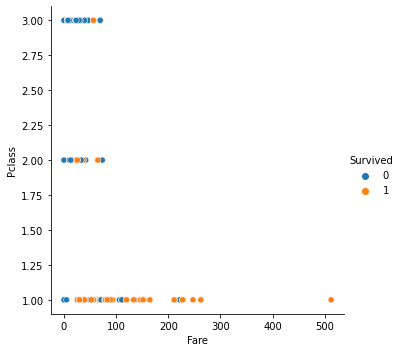

In [25]:
sns.relplot(x = "Fare", y = "Pclass", data = train_data, hue = "Survived")

- Higher fare values for passeneger class 1, compared to class 2 and 3 which have almost the same level of fare charged. 
- The higher the passenger class, the lower the chances of survival
- A larger number of passengers in passenger class 3 did not survive relative to passenger class 1. 


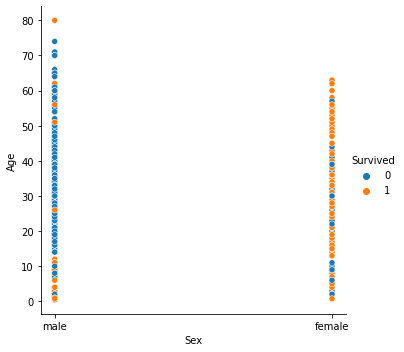

In [26]:
sns.relplot(x = "Sex", y = "Age", data = train_data, hue = "Survived")

- More females than males survived.
- Oldest female about 65 years, while oldest male at about 80 years old. 
- Highest death rate for males between 15 - 50 years old, and survival rate for females in the same age range. 

<AxesSubplot:xlabel='Sex'>

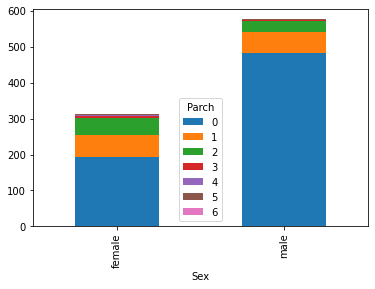

In [27]:
train_data.groupby(["Sex", "Parch"]).size().unstack(1).plot(kind="bar", stacked = True)

### Correlation Heatmap

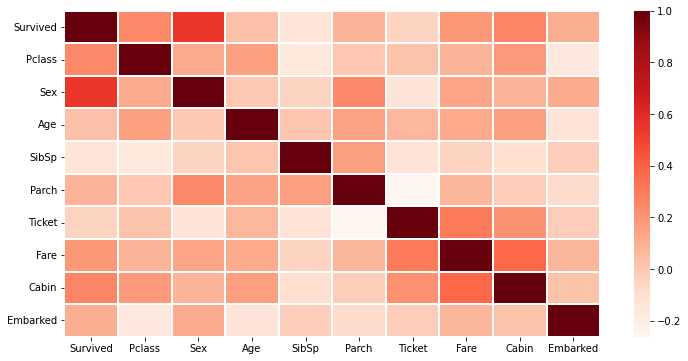

In [28]:
plt.figure(figsize=(12, 6))

df = train_data.drop(['PassengerId', 'Name'],axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="Reds")

- Sex, age, Passenger Class Embarking Station, Fare and Cabin with highest positive correlation to survival.
- Possibility that fare is influenced by passenger's Cabin.

## Training and Test Data on Train Dataset

In [29]:
# dependent variable from train dataset

y_data = train_data['Survived']
y_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
# independent variables
# pick columns with high correlation to Survival rate

x_data = train_data.drop(['PassengerId', 'Name', 'Survived', 'Ticket', 'Cabin'], axis = 1)
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Encoding Categorical Data

In [31]:
x_data = pd.get_dummies(x_data, columns = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked'])


In [32]:
x_data.head(5)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [33]:
# Normalizing independent data using Standard Scaler

from sklearn.preprocessing import StandardScaler

# create an instance
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_data)
x_scaled = pd.DataFrame(x_scaled, columns=x_data.columns)
x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.597055,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
1,0.634162,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803
2,-0.289251,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
3,0.403309,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
4,0.403309,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838


In [34]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y_data, random_state=96, stratify=y_data)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression as LogReg 
from sklearn.metrics import f1_score

In [36]:
# creating an instance
logreg = LogReg()

#running logreg model
logreg.fit(xtrain, ytrain)

# make prediction on train dataset
train_predict = logreg.predict(xtrain)

# make prediction on test dataset
test_predict = logreg.predict(xtest)

# f1 score on predicted ydata against training ydata

k = f1_score(train_predict, ytrain)
kk = f1_score(test_predict, ytest)

print('F1 score for training dataset is ', k)
print('F1 score for testing dataset is ', kk)

F1 score for training dataset is  0.7509881422924901
F1 score for testing dataset is  0.736842105263158


- The f1_scores on the training and testing data are okay and farely close to one another.

### Evaluation metrics : Confusion Matrix and Classification Report

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, test_predict))

from sklearn.metrics import classification_report as rep
print(rep(ytest, test_predict))

[[127  10]
 [ 30  56]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       137
           1       0.85      0.65      0.74        86

    accuracy                           0.82       223
   macro avg       0.83      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



In [38]:
### Significant Coefficients

Coef = pd.DataFrame({
    "Variables" : xtrain.columns,
    "Coefficients" : abs(logreg.coef_.reshape(-1))

})
Coef.head()

sig_var = Coef[Coef.Coefficients > 0.3]
sig_var

,Variables,Coefficients
0,Age,0.492716
2,Pclass_1,0.478749
4,Pclass_3,0.477042
5,Sex_female,0.611555
6,Sex_male,0.611555
12,SibSp_5,0.343239
13,SibSp_8,0.405972
18,Parch_4,0.314422


- Sex, age and passenger class 3 are the most significant coefficients with regard to survival.

### Logistic Regression Based on Significant Columns

In [39]:
sig_data = x_scaled[['Age',
 'Pclass_1',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'SibSp_8',
 'Parch_4']]

sig_data

,Age,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_8,Parch_4
0,-0.597055,-0.565685,0.902587,-0.737695,0.737695,-0.088986,-0.067153
1,0.634162,1.767767,-1.107926,1.355574,-1.355574,-0.088986,-0.067153
2,-0.289251,-0.565685,0.902587,1.355574,-1.355574,-0.088986,-0.067153
3,0.403309,1.767767,-1.107926,1.355574,-1.355574,-0.088986,-0.067153
4,0.403309,-0.565685,0.902587,-0.737695,0.737695,-0.088986,-0.067153
...,...,...,...,...,...,...,...
886,-0.212299,-0.565685,-1.107926,-0.737695,0.737695,-0.088986,-0.067153
887,-0.827908,1.767767,-1.107926,1.355574,-1.355574,-0.088986,-0.067153
888,0.018554,-0.565685,0.902587,1.355574,-1.355574,-0.088986,-0.067153
889,-0.289251,1.767767,-1.107926,-0.737695,0.737695,-0.088986,-0.067153


In [40]:
x_train, x_test, y_train, y_test = train_test_split(sig_data,y_data, random_state=42, stratify=y_data)

In [41]:
# creating an instance
logreg = LogReg()

#running logreg model
logreg.fit(x_train, y_train)

# make prediction on train dataset
train_predict = logreg.predict(x_train)

# make prediction on test dataset
test_predict = logreg.predict(x_test)

# f1 score on predicted ydata against training ydata

k = f1_score(train_predict, y_train)
kk = f1_score(test_predict, y_test)

print('F1 score for training dataset is ', k)
print('F1 score for testing dataset is ', kk)

F1 score for training dataset is  0.7322834645669293
F1 score for testing dataset is  0.7150837988826816


- F1 score reduces from the F1 score of the model containing all columns

## KFold

In [42]:
from sklearn.model_selection import KFold # for validation

In [43]:
def cv_score(ml_model, rstate = 42,cols = x_data.columns):
    #initialize
    i = 1
    cv_scores = []
    
    # data
    df1 = x_data.copy()
    df1 = x_data[cols]
    df_y = y_data
    
    # initialize kfold
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    
    for train_index,test_index in kf.split(df1,df_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = df_y[train_index],df_y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        
        f1score_train = f1_score(ytr, train_val)
        f1score = f1_score(yvl, pred_val)
        
        sufix = ""
        msg = ""
        msg += "Valid f1score: {:.5f}".format(f1score)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(f1score)
        i+=1
    return cv_scores

In [44]:
logreg_kfold = cv_score(LogReg())


1 of kfold 5
Valid f1score: 0.74648

2 of kfold 5
Valid f1score: 0.73171

3 of kfold 5
Valid f1score: 0.81159

4 of kfold 5
Valid f1score: 0.65600

5 of kfold 5
Valid f1score: 0.73846


- The f1 score for kfolds 1 and 3 are higher than the f1 score on the logistic regression model with no folds.

- The f1 score for 3 kfolds is the highest, and good enough to confirm that the model predicts each observation correctly.

- It can therefore be used on the test data.

### k fold on significant data


In [45]:
#k fold on significant data

def cv_score(ml_model, rstate = 42,cols = sig_data.columns):
    #initialize
    i = 1
    cv_scores = []
    
    # data
    df1 = sig_data.copy()
    df1 = sig_data[cols]
    df_y = y_data
    
    # initialize kfold
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    
    for train_index,test_index in kf.split(df1,df_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = df_y[train_index],df_y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        
        f1score_train = f1_score(ytr, train_val)
        f1score = f1_score(yvl, pred_val)
        
        sufix = ""
        msg = ""
        msg += "Valid f1score: {:.5f}".format(f1score)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(f1score)
        i+=1
    return cv_scores

logreg_sig = cv_score(LogReg())


1 of kfold 5
Valid f1score: 0.74648

2 of kfold 5
Valid f1score: 0.68800

3 of kfold 5
Valid f1score: 0.78873

4 of kfold 5
Valid f1score: 0.64000

5 of kfold 5
Valid f1score: 0.72464


- K Fold on significant data lower, with highest F1 score noted on kfold splits = 3

In [46]:
## Predict using 3 folds on test data

test_data = pd.read_csv("../input/titanic/test.csv")

In [47]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test_data.shape

(418, 11)

In [49]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
age_mean_val = test_data['Age'].mean().round()
test_data['Age'] = test_data['Age'].fillna(age_mean_val)

In [51]:
fare_mean_val = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(fare_mean_val)

In [52]:
cabin_mode_val = test_data['Cabin'].mode()[0]
test_data['Cabin'] = test_data['Cabin'].fillna(cabin_mode_val)

In [53]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [55]:
sig_data = test_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
sig_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [56]:
sig_data = pd.get_dummies(sig_data, columns = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked'])
sig_data = sig_data.drop(['Parch_9'], axis = 1)
sig_data.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [57]:
# Normalizing independent data using Standard Scaler

from sklearn.preprocessing import StandardScaler

# create an instance
scaler = StandardScaler()

test_x_data = scaler.fit_transform(sig_data)
test_x_data = pd.DataFrame(test_x_data, columns=sig_data.columns)
test_x_data.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.339424,-0.498407,-0.586559,-0.534933,0.957826,-0.755929,0.755929,0.690675,-0.597614,-0.186154,...,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.568142,2.843757,-1.350676
1,1.329924,-0.513274,-0.586559,-0.534933,0.957826,1.322876,-1.322876,-1.447859,1.673320,-0.186154,...,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.568142,-0.351647,0.740370
2,2.518523,-0.465088,-0.586559,1.869391,-1.044031,-0.755929,0.755929,0.690675,-0.597614,-0.186154,...,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.568142,2.843757,-1.350676
3,-0.254876,-0.483466,-0.586559,-0.534933,0.957826,-0.755929,0.755929,0.690675,-0.597614,-0.186154,...,0.538631,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.568142,-0.351647,0.740370
4,-0.651076,-0.418471,-0.586559,-0.534933,0.957826,1.322876,-1.322876,-1.447859,1.673320,-0.186154,...,-1.856558,2.65301,-0.29277,-0.085023,-0.069338,-0.04897,-0.04897,-0.568142,-0.351647,0.740370


In [58]:
## Predicting using the trained kfold model
from sklearn.model_selection import KFold # for validation

def cv_score(ml_model, rstate = 42,cols = x_data.columns):
    #initialize
    i = 1
    cv_scores = []
    
    # data
    df1 = x_data.copy()
    df1 = x_data[cols]
    df_y = y_data
    
    # initialize kfold
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    
    for train_index,test_index in kf.split(df1,df_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = df_y[train_index],df_y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        
        f1score_train = f1_score(ytr, train_val)
        f1score = f1_score(yvl, pred_val)
        
        sufix = ""
        msg = ""
        msg += "Valid f1score: {:.5f}".format(f1score)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(f1score)
        i+=1
    return cv_scores

In [59]:
logreg_kfold = cv_score(LogReg())


1 of kfold 5
Valid f1score: 0.74648

2 of kfold 5
Valid f1score: 0.73171

3 of kfold 5
Valid f1score: 0.81159

4 of kfold 5
Valid f1score: 0.65600

5 of kfold 5
Valid f1score: 0.73846


- Highest F1 score metric using logistic linear regression model with 3 folds. 
- Train model using this on train dataset
- Predict on test dataset.


In [60]:
kf = KFold(n_splits=3,random_state=42,shuffle=True)
    
test_model = LogReg()

In [61]:

from sklearn.model_selection import cross_val_score
results = cross_val_score(test_model, xtrain, ytrain, cv=kf)

# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.386% (3.421%)


In [62]:
test_model.fit(xtrain, ytrain)

LogisticRegression()

In [63]:
predicted = test_model.predict(test_x_data)
predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
final_result = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : predicted
})

In [65]:
final_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [66]:
final_result.to_csv('./submission.csv', index = False)